## MACHINE LEARNING 

### DATA MUNGING 

In [2]:
#IMPORT DEPENDENCIES
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#READ DATA INTO DATAFRAME
df = pd.read_csv("resources/HistoricalData/BayAreaSummary.csv")

In [4]:
df.reset_index(inplace=True, drop=True)

In [5]:
df = df.drop(["Unnamed: 0", "Year"], axis=1)

In [6]:
df.head()

TotalPop  HouseholdPop  EstHouseholds  Net_Migration  Immigration  \
0   6063929       5914746        2268498          26173        45028   
1   6150405       5996580        2288446          32671        49980   
2   6236622       6084002        2308925          30248        50644   
3   6296661       6144064        2326344         -13351        41806   
4   6330094       6180022        2344173         -18169        32940   

   Domestic_Migration  Population  Employers  Employees  AvgAnnualPay  \
0              -18855     6063929     184128    2942366   28240.44444   
1              -17309     6150405     195298    2887645   30080.88889   
2              -20396     6236622     202087    2879500   30708.55556   
3              -55157     6296661     199363    2900397   31565.11111   
4              -51109     6330094     214307    2964060   32787.77778   

   New Homes Constructed  HousingUnits  Avg.Median Home price  Interest_Rate  \
0                  16396       2385091                 234197           9.34   
1                  16857       2401487                 233964           8.11   
2                  13781       2418344                 232320           7.13   
3                  14482       2432125                 238903           7.49   
4                  14371       2446607                 239315           7.85   

         HAI  HU_HH_Ratio  Pop_HU_Ratio  
0  20.538462     1.051397    269.285406  
1  25.545455     1.049396    270.309115  
2  31.750000     1.047390    269.799014  
3  30.333333     1.045471    268.907677  
4  28.583333     1.043697    267.561796

#  

### INITIAL CORRELATION CHECK BETWEEN DEPENDENT & POTENTIAL PREDICTOR VARIABLES

In [7]:
df.corr()

TotalPop  HouseholdPop  EstHouseholds  Net_Migration  \
TotalPop               1.000000      0.999967       0.987640       0.176800   
HouseholdPop           0.999967      1.000000       0.987601       0.173730   
EstHouseholds          0.987640      0.987601       1.000000       0.123780   
Net_Migration          0.176800      0.173730       0.123780       1.000000   
Immigration           -0.041346     -0.041171      -0.043409      -0.155980   
Domestic_Migration     0.175526      0.172599       0.126114       0.975426   
Population             0.980072      0.980555       0.961840       0.110605   
Employers              0.938529      0.938395       0.923665       0.143713   
Employees              0.814899      0.816856       0.770957       0.294666   
AvgAnnualPay           0.970871      0.970787       0.967366       0.125181   
New Homes Constructed -0.075163     -0.069854      -0.057944      -0.305641   
HousingUnits           0.940152      0.940259       0.950957       0.045093   
Avg.Median Home price  0.799286      0.800972       0.814675      -0.180791   
Interest_Rate         -0.876945     -0.876772      -0.848218      -0.055196   
HAI                   -0.020939     -0.024168      -0.069696       0.406303   
HU_HH_Ratio            0.152787      0.153174       0.153226      -0.215355   
Pop_HU_Ratio          -0.270808     -0.272385      -0.201112      -0.379374   

                       Immigration  Domestic_Migration  Population  Employers  \
TotalPop                 -0.041346            0.175526    0.980072   0.938529   
HouseholdPop             -0.041171            0.172599    0.980555   0.938395   
EstHouseholds            -0.043409            0.126114    0.961840   0.923665   
Net_Migration            -0.155980            0.975426    0.110605   0.143713   
Immigration               1.000000           -0.369778   -0.073608  -0.171828   
Domestic_Migration       -0.369778            1.000000    0.120458   0.173508   
Population               -0.073608            0.120458    1.000000   0.973688   
Employers                -0.171828            0.173508    0.973688   1.000000   
Employees                 0.196253            0.233397    0.772258   0.694902   
AvgAnnualPay             -0.070669            0.133513    0.989333   0.972157   
New Homes Constructed     0.387770           -0.373992   -0.114884  -0.247501   
HousingUnits             -0.117368            0.068596    0.972967   0.969255   
Avg.Median Home price     0.177585           -0.209670    0.815038   0.738533   
Interest_Rate             0.208458           -0.098418   -0.932749  -0.933747   
HAI                      -0.524729            0.499227    0.026854   0.153069   
HU_HH_Ratio              -0.246281           -0.147636    0.331107   0.429378   
Pop_HU_Ratio             -0.290989           -0.291945   -0.152323  -0.040030   

                       Employees  AvgAnnualPay  New Homes Constructed  \
TotalPop                0.814899      0.970871              -0.075163   
HouseholdPop            0.816856      0.970787              -0.069854   
EstHouseholds           0.770957      0.967366              -0.057944   
Net_Migration           0.294666      0.125181              -0.305641   
Immigration             0.196253     -0.070669               0.387770   
Domestic_Migration      0.233397      0.133513              -0.373992   
Population              0.772258      0.989333              -0.114884   
Employers               0.694902      0.972157              -0.247501   
Employees               1.000000      0.735657               0.321188   
AvgAnnualPay            0.735657      1.000000              -0.154164   
New Homes Constructed   0.321188     -0.154164               1.000000   
HousingUnits            0.647884      0.988255              -0.192804   
Avg.Median Home price   0.725683      0.829636               0.291740   
Interest_Rate          -0.548573     -0.919119               0.307883   
HAI                    -0.296113      0.018286

#  

### PLOT TO VISUALIZE THE CORRELATION

#### GROUP #1

In [8]:
df_new = df[["Avg.Median Home price","TotalPop","HouseholdPop","EstHouseholds" ,"Net_Migration","Immigration","Interest_Rate"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a09ce54a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a0f6f8b00>]], dtype=object)

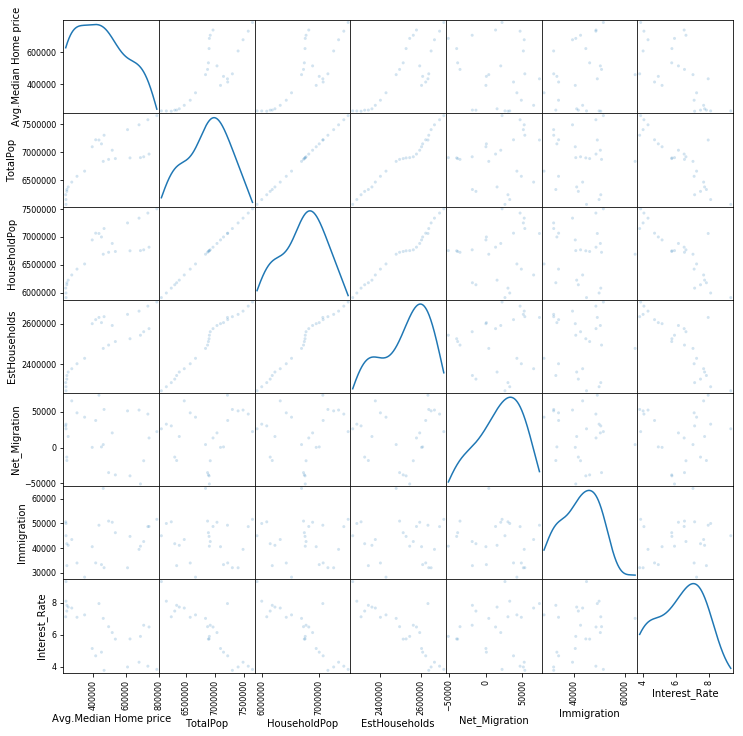

In [9]:
scatter_matrix(df_new, alpha=0.2, figsize=(12, 12), diagonal='kde')

In [10]:
df_new1 = df[["Avg.Median Home price","Domestic_Migration","Employers", "Employees","AvgAnnualPay","New Homes Constructed"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13074a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a139f41d0>]], dtype=object)

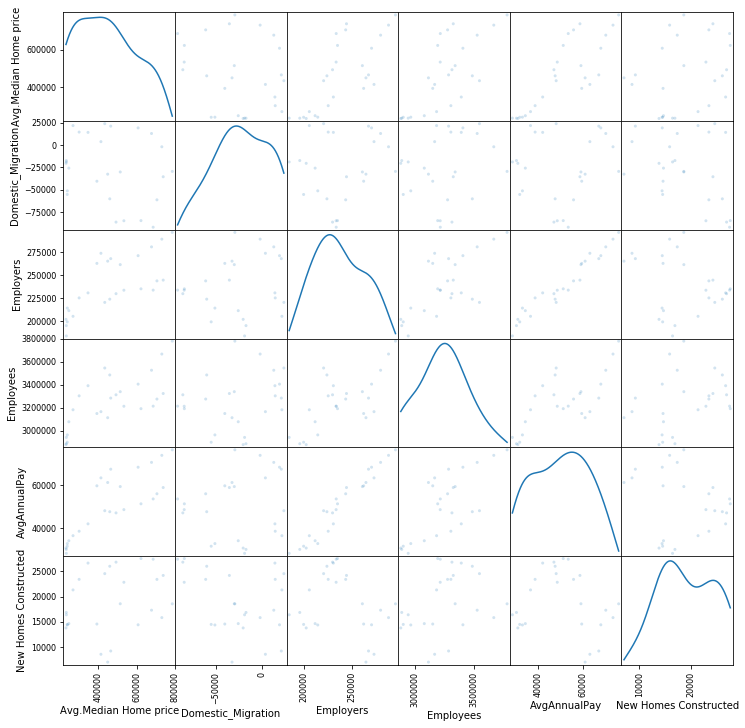

In [11]:
scatter_matrix(df_new1, alpha=0.2, figsize=(12, 12), diagonal='kde')

### SELECT FINAL 3 PREDICTOR VARIABLES

In [11]:
Final_df = df[["Avg.Median Home price", "AvgAnnualPay","EstHouseholds", "Employees"]]

In [12]:
Final_df.head()

Avg.Median Home price  AvgAnnualPay  EstHouseholds  Employees
0                 234197   28240.44444        2268498    2942366
1                 233964   30080.88889        2288446    2887645
2                 232320   30708.55556        2308925    2879500
3                 238903   31565.11111        2326344    2900397
4                 239315   32787.77778        2344173    2964060

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17bf4da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1816a7f0>]], dtype=object)

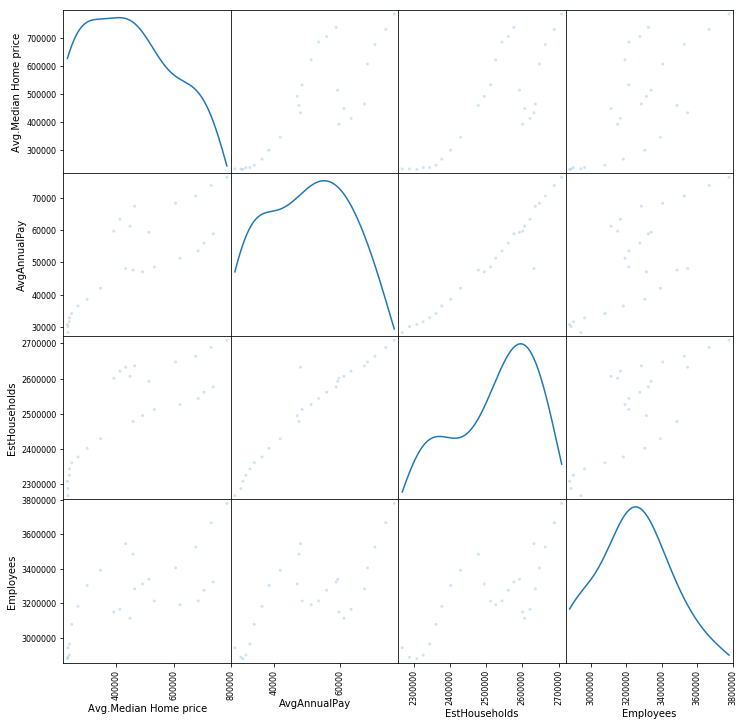

In [13]:
scatter_matrix(Final_df, alpha=0.2, figsize=(12, 12), diagonal='kde')

In [14]:
Final_df.corr()

Avg.Median Home price  AvgAnnualPay  EstHouseholds  \
Avg.Median Home price               1.000000      0.829636       0.814675   
AvgAnnualPay                        0.829636      1.000000       0.967366   
EstHouseholds                       0.814675      0.967366       1.000000   
Employees                           0.725683      0.735657       0.770957   

                       Employees  
Avg.Median Home price   0.725683  
AvgAnnualPay            0.735657  
EstHouseholds           0.770957  
Employees               1.000000

# Multi-Variate Linear Regression Model

### Dependent Variable = Avg.Median Home price	
###   Predictor Variables/Features = Employees, EstHouseholds, Average Annual Pay

In [15]:
# Assign the data to X and y

X = Final_df[["Employees", "EstHouseholds", "AvgAnnualPay"]]
y = Final_df["Avg.Median Home price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(26, 3) (26, 1)


In [16]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [17]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print ("-----------------------------------")
print ("CHECK ACCURACY")
print ("-----------------------------------")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print ("-----------------------------------")
print ("RESULT")
print ("-----------------------------------")
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

-----------------------------------
CHECK ACCURACY
-----------------------------------
Training Score: 0.6993646901042262
Testing Score: 0.6571428402273167
-----------------------------------
RESULT
-----------------------------------
Weight coefficients:  [[ 0.2330803  -0.20830756  9.1443941 ]]
y-axis intercept:  [-236966.40977284]


Text(0.5,1,'Residual Plot')

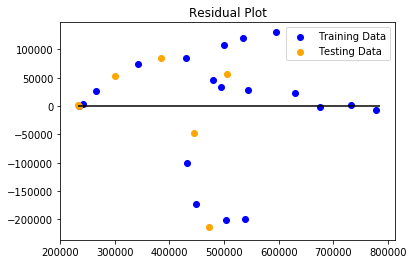

In [18]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")